In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('crop.csv')
df.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90,42,43,21,82,6.5,203,rice
1,85,58,41,22,80,7.0,227,rice
2,60,55,44,23,82,7.8,264,rice
3,74,35,40,26,80,7.0,243,rice
4,78,42,42,20,82,7.6,263,rice


In [7]:
df.describe()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.613182,71.482727,6.470045,103.458182
std,36.917334,32.985883,50.647931,5.080069,22.273052,0.774830,54.964423
min,0.000000,5.000000,5.000000,9.000000,14.000000,3.500000,20.000000
25%,21.000000,28.000000,20.000000,23.000000,60.000000,6.000000,65.000000
50%,37.000000,51.000000,32.000000,26.000000,80.000000,6.400000,95.000000
75%,84.250000,68.000000,49.000000,29.000000,90.000000,6.900000,124.000000
max,140.000000,145.000000,205.000000,44.000000,100.000000,9.900000,299.000000


In [12]:
corr_matrix = df.corr()

print("Correlation Matrix is : ")
print(corr_matrix)

Correlation Matrix is : 
             NITROGEN  PHOSPHORUS  POTASSIUM  TEMPERATURE  HUMIDITY        PH  \
NITROGEN     1.000000   -0.231460  -0.140512     0.026165  0.190674  0.096390   
PHOSPHORUS  -0.231460    1.000000   0.736232    -0.128844 -0.118273 -0.138316   
POTASSIUM   -0.140512    0.736232   1.000000    -0.161176  0.191277 -0.169293   
TEMPERATURE  0.026165   -0.128844  -0.161176     1.000000  0.206334 -0.018160   
HUMIDITY     0.190674   -0.118273   0.191277     0.206334  1.000000 -0.008384   
PH           0.096390   -0.138316  -0.169293    -0.018160 -0.008384  1.000000   
RAINFALL     0.058973   -0.063725  -0.053250    -0.029112  0.093759 -0.109205   

             RAINFALL  
NITROGEN     0.058973  
PHOSPHORUS  -0.063725  
POTASSIUM   -0.053250  
TEMPERATURE -0.029112  
HUMIDITY     0.093759  
PH          -0.109205  
RAINFALL     1.000000  


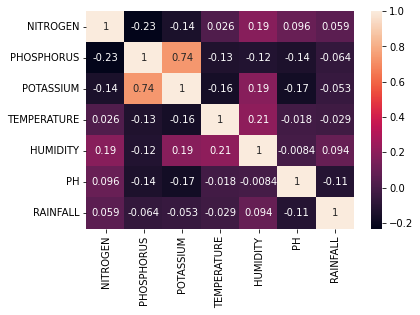

In [13]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df.diff

<bound method DataFrame.diff of       NITROGEN  PHOSPHORUS  POTASSIUM  TEMPERATURE  HUMIDITY   PH  RAINFALL  \
0           90          42         43           21        82  6.5       203   
1           85          58         41           22        80  7.0       227   
2           60          55         44           23        82  7.8       264   
3           74          35         40           26        80  7.0       243   
4           78          42         42           20        82  7.6       263   
...        ...         ...        ...          ...       ...  ...       ...   
2195       107          34         32           27        66  6.8       178   
2196        99          15         27           27        57  6.1       128   
2197       118          33         30           24        67  6.4       173   
2198       117          32         34           26        52  6.8       127   
2199       104          18         30           24        60  6.8       141   

        CROP  
0   

In [ ]:
columns = ['NITROGEN', 'PHOSPHORUS', 'POTASSIUM', 'TEMPERATURE', 'HUMIDITY', 'PH', 'RAINFALL', 'CROP']
for col in columns:
    print(col, "\n", df[col].unique(), "\n")

NITROGEN 
 [ 90  85  60  74  78  69  94  89  68  91  93  77  88  76  67  83  98  66
  97  84  73  92  95  99  63  62  64  82  79  65  75  71  72  70  86  61
  81  80 100  87  96  40  23  39  22  36  32  58  59  42  28  43  27  50
  25  31  26  54  57  49  46  38  35  52  44  24  29  20  56  37  51  41
  34  30  33  47  53  45  48  13   2  17  12   6  10  19  11  18  21  16
   9   1   7   8   0   3   4   5  14  15  55 105 108 118 101 106 109 117
 114 110 112 111 102 116 119 107 104 103 120 113 115 133 136 126 121 129
 122 140 131 135 123 125 139 132 127 130 134] 

PHOSPHORUS 
 [ 42  58  55  35  37  53  54  46  56  50  48  38  45  40  59  41  47  49
  51  57  39  43  44  60  52  36  72  67  73  70  62  74  66  63  71  78
  80  68  65  77  76  79  61  64  69  75  24  18  26  27  25  21  30  11
   5  10   7  20  22  15  23   8  16  29  17   6  19  13   9  14  28  94
  95  92  89  88  87  85  86  83  91  81  84  90  82  93  33  31  34  32
 130 144 123 125 131 140 122 134 145 139 141 138 136

In [ ]:
for col in columns:
    print(df[col].isnull)

<bound method Series.isnull of 0        90
1        85
2        60
3        74
4        78
       ... 
2195    107
2196     99
2197    118
2198    117
2199    104
Name: NITROGEN, Length: 2200, dtype: int64>
<bound method Series.isnull of 0       42
1       58
2       55
3       35
4       42
        ..
2195    34
2196    15
2197    33
2198    32
2199    18
Name: PHOSPHORUS, Length: 2200, dtype: int64>
<bound method Series.isnull of 0       43
1       41
2       44
3       40
4       42
        ..
2195    32
2196    27
2197    30
2198    34
2199    30
Name: POTASSIUM, Length: 2200, dtype: int64>
<bound method Series.isnull of 0       21
1       22
2       23
3       26
4       20
        ..
2195    27
2196    27
2197    24
2198    26
2199    24
Name: TEMPERATURE, Length: 2200, dtype: int64>
<bound method Series.isnull of 0       82
1       80
2       82
3       80
4       82
        ..
2195    66
2196    57
2197    67
2198    52
2199    60
Name: HUMIDITY, Length: 2200, dtype: int64>
<bo

In [ ]:
df.dropna()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90,42,43,21,82,6.5,203,rice
1,85,58,41,22,80,7.0,227,rice
2,60,55,44,23,82,7.8,264,rice
3,74,35,40,26,80,7.0,243,rice
4,78,42,42,20,82,7.6,263,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,27,66,6.8,178,coffee
2196,99,15,27,27,57,6.1,128,coffee
2197,118,33,30,24,67,6.4,173,coffee
2198,117,32,34,26,52,6.8,127,coffee


In [ ]:
le = preprocessing.LabelEncoder()
X = df.iloc[:, 0:7]
y = df['CROP']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y

array([20, 20, 20, ...,  5,  5,  5])

In [ ]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
SVM = accuracy_score(y_test, y_predict)*100
print(SVM)

98.18181818181819


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha=0.001, max_iter=600)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
SGDClassifier = accuracy_score(y_test, y_pred)*100
print(SGDClassifier)

74.36363636363636


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
KNN = accuracy_score(y_test, y_pred)*100
print(KNN)

97.81818181818181


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
GaussianNB = accuracy_score(y_test, y_pred)*100
print(GaussianNB)

99.45454545454545


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=10)
y_pred = clf.fit(X_train, y_train).predict(X_test)
DecisionTreeClassifier = accuracy_score(y_test, y_pred)*100
print(DecisionTreeClassifier)

99.0909090909091


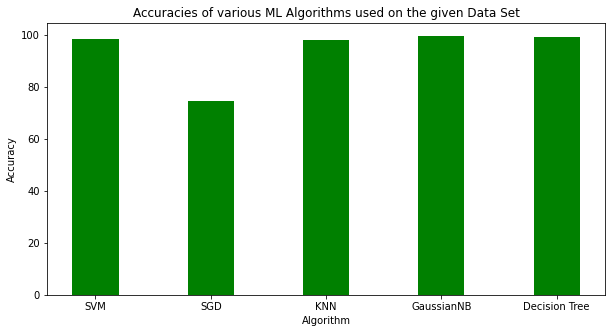

In [ ]:
data = {'SVM':SVM, 'SGD':SGDClassifier, 'KNN':KNN,
        'GaussianNB':GaussianNB, 'Decision Tree':DecisionTreeClassifier}

algorithm = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithm, accuracy, color ='green',
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracies of various ML Algorithms used on the given Data Set")
plt.show()